# Lesson 3 Practical Application
## C2C Izaiah LaDuke

In [32]:
import numpy as np
from datascience import *
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

2.) Use Basic Python operators to find the number of seconds in the month of June. Find the number of seconds that have lapsed between 14 Aug, 0930 and 1 June, 1200.

In [33]:
seconds_june=60*60*24*30
seconds_june

2592000

In [34]:
(datetime(2018,8,14,9,30)-datetime(2018,6,1,12)).days*24*60*60+(datetime(2018,8,14,9,30)-datetime(2018,6,1,12)).seconds

6384600

3.) Import a table ('world_populatioin.csv') and find:

In [35]:
population= Table.read_table('world_population.csv')
print(population)

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593
... (56 rows omitted)


a. the population in 2015 (latest year)

In [36]:
population.item(-1)

Population
7256490011


b. The population growth between 1950 (beginning of dataset) and 2016.

In [37]:
population.column(0).item(-1)-population.column(0).item(0)

4698861357

c. The annual growth rates over the course of the dataset.
pop_2015=pop_1950(1+rate)^65

In [38]:
100*((population.column(0).item(-1)/population.column(0).item(0))** (1/65)-1)

1.617270380658975

4) The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:
https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv.
Information about this dataset can be found at a kaggle site
(https://www.kaggle.com/c/titanic). Import this dataset and answer the following
questions:

In [39]:
titanic=Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


a. Relabel the ‘Pclass’ column to ‘passenger_class’.

In [40]:
titanic=titanic.relabeled('Pclass','passenger_class')
titanic

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


b. Create a new column ‘family_size’ that adds the number of siblings/spouses,
‘SibSp’, to the number of children, ‘Parch’.

In [41]:
titanic=titanic.with_columns('family_size',titanic.column('SibSp')+titanic.column('Parch'))
titanic

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


c. Create a barplot of number of passengers, broken down by passenger class.
HINT: you will need to use the group method on the dataset; for more info, see
the datascience package help.

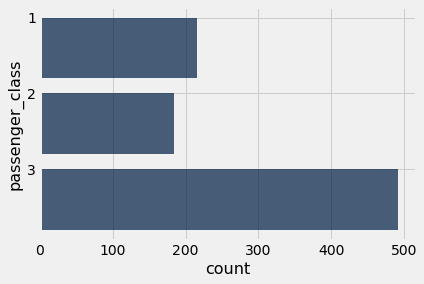

In [42]:
titanic_bar=titanic.drop('PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked')
titanic_bar.sort('passenger_class')
titanic_bar.groups(['passenger_class']).barh('passenger_class')

d. Sort the data by age and show the youngest 5 passengers.

In [43]:
titanic.sort('Age').show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


e. Now sort by age from oldest to youngest and show the oldest 5 passengers.
What did you notice? Eliminate these “nan” values and try again.

In [44]:
titanic.sort('Age',descending=True).where('Age',are.below(1000)).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


f. Find the survival rate for passengers of the Titanic, broken down by passenger
class. (You will need to use group again.)

In [45]:
titanic_sum=titanic.groups(['passenger_class'],sum)
survival_rate=titanic_sum.column('Survived sum')/titanic_sum.column('family_size sum')
titanic_sum=titanic_sum.with_columns('Survival_rate',survival_rate)

g. Now that you have some familiarity with the dataset, create two of your own
questions and answer them.

g. part 1: Create a bar graph that compares the number of males and females on the ship.

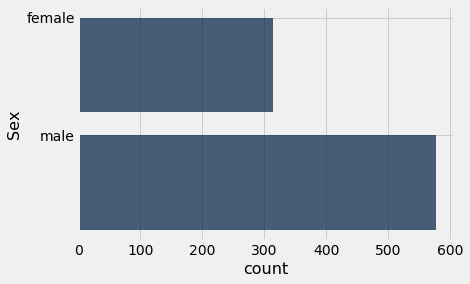

In [46]:
titanic.groups(['Sex']).barh('Sex')

g. part 2: Graph a scatter plot with age and fare and see if there seems to be an association.

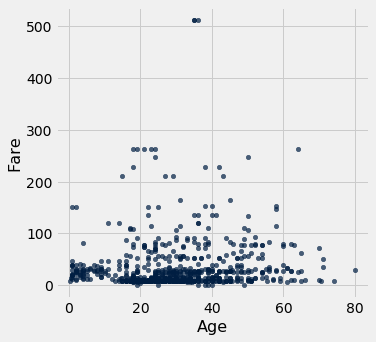

In [47]:
fare_age=titanic.drop('PassengerId','Survived','passenger_class','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','family_size')
fare_age.scatter('Age')

From this graph, there does not seem to be an association between age and fare.